## Exploratory Data Analysis (EDA) for Baby weight prediction

Columns:
- Case (id number)
- birth weight (ounce)
- gestation (in days)
- parity (indicator for first pregancy or not. 0 for first)
- age (mother's age)
- height (mother's height in inches)
- weight (mother's weight in pounds)
- smoke (binary indicator for wether the mother smokes of not) 

To do list for EDA:
- importing the necessary library
- importing the dataset
- data checks
- data cleaning
- eda

In [32]:
# importing the neccessary library
import numpy as np #for numerical python
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for low level data visualization
import seaborn as sns #for high level data visualization
import warnings # waring library

warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
#importing the dataset
df=pd.read_csv("babies.csv")

df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


In [34]:
df.shape

(1236, 8)

There are 1236 rows and 8 columns in the dataset

In [35]:
df.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

insights:
- case = case number
- bwt = child's birth weight (in ounce)
- gestation = gestation period (in days)
- parity = check whether it's first pregancy or not (0 for first and 1 for not first)
- age = mother's age
- height = mother's height (in inches)
- weight = mother's weight (pounds)
- smoke = to check if the mother smokes or not (0 no/ 1 yes)

In [36]:
df.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

observation:
There are five columns with missing values:
- gestation has 13 missing values
- mother's age has 2 missing values
- mother's height has 22 missing values
- mother's weight has 36 missing values
- smoke has 10 missing values 

In [37]:
# checking for duplicated data
df.duplicated().sum()

np.int64(0)

insight/observation:
- There are no duplicate data in the dataset

In [38]:
#checking the statistics of the dataset
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


Observation:
- based on the comparison of the 50% percentile and the mean, all the contineous columns are normally distributed

In [39]:
##checking for the unique data
df.nunique()

case         1236
bwt           107
gestation     106
parity          2
age            30
height         19
weight        105
smoke           2
dtype: int64

observation/insight:
- There are 107 unique data for the children's bwt column
- There are two unique values in the parity column
- There are 30 unique values in the age column
- There are 19 unique values in height
- There are 105 unique values in weight
- There are 2 unique values in smoke 

In [42]:
## checking the datatype
df.dtypes

case           int64
bwt            int64
gestation    float64
parity         int64
age          float64
height       float64
weight       float64
smoke        float64
dtype: object

Insight and Observation:
- 3 of the 8 features in the dataset are integers while the remaining 5 are float(decimals)
- list of integers include (case, bwt,parity)
- list of floats include (getation, age, height,weight,smoke)

In [43]:
df.isna().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [44]:
df["gestation"].unique()

array([284., 282., 279.,  nan, 286., 244., 245., 289., 299., 351., 281.,
       273., 285., 255., 261., 288., 270., 274., 287., 276., 294., 280.,
       266., 292., 278., 268., 275., 283., 267., 293., 302., 248., 272.,
       291., 258., 257., 232., 246., 277., 296., 305., 271., 254., 303.,
       269., 264., 243., 225., 265., 262., 300., 336., 318., 290., 301.,
       295., 306., 239., 320., 310., 260., 234., 233., 249., 329., 328.,
       148., 256., 308., 319., 307., 315., 313., 304., 298., 297., 251.,
       263., 235., 323., 223., 252., 241., 247., 240., 250., 309., 316.,
       237., 259., 229., 242., 330., 253., 238., 228., 224., 181., 314.,
       204., 324., 312., 236., 311., 353., 338., 321.])

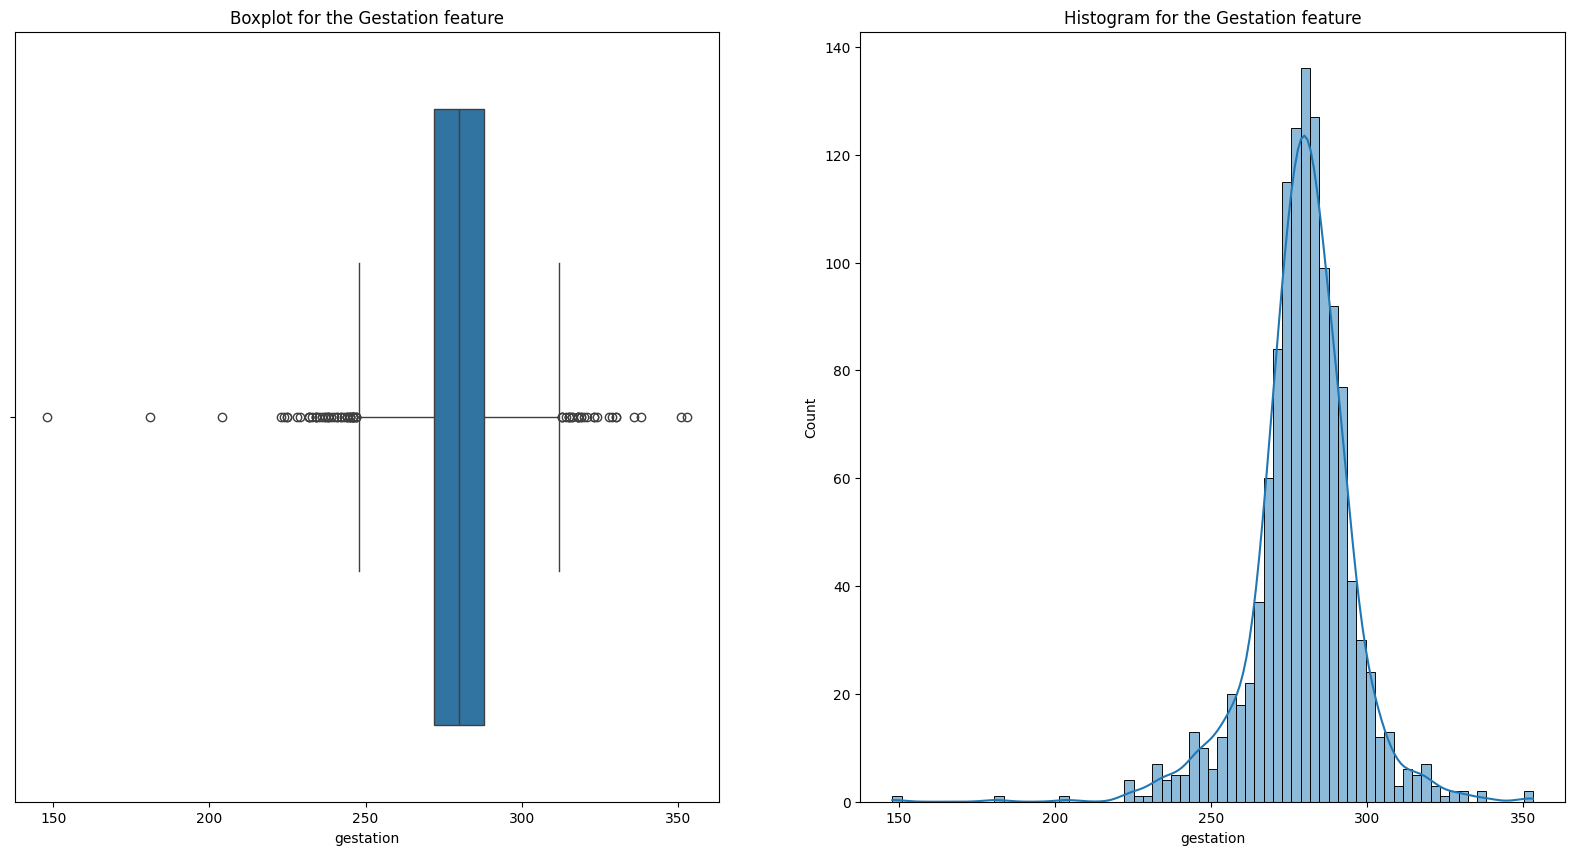

In [99]:
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Boxplot for the Gestation feature')
sns.boxplot(df, x='gestation')

plt.subplot(1,2,2)
plt.title('Histogram for the Gestation feature')
sns.histplot(df, x='gestation', kde=True)

plt.show()

In [65]:
df.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

In [73]:
df['gestation'].mean()

np.float64(279.3385118560916)

observation:
- as a numerical data and based on the presence of outliers in the dataset, we'll use the mean of the gestation feature for out data imputation

In [74]:
## replacing missing data with mean
df['gestation'].fillna(df['gestation'].mean(), inplace=True)

In [76]:
df.age.unique()

array([27., 33., 28., 36., 23., 25., 30., 32., 38., 43., 22., 26., 20.,
       34., 24., 31., 37., 21., 39., 35., 29., 19., 42., 40., 18., nan,
       17., 41., 15., 44., 45.])

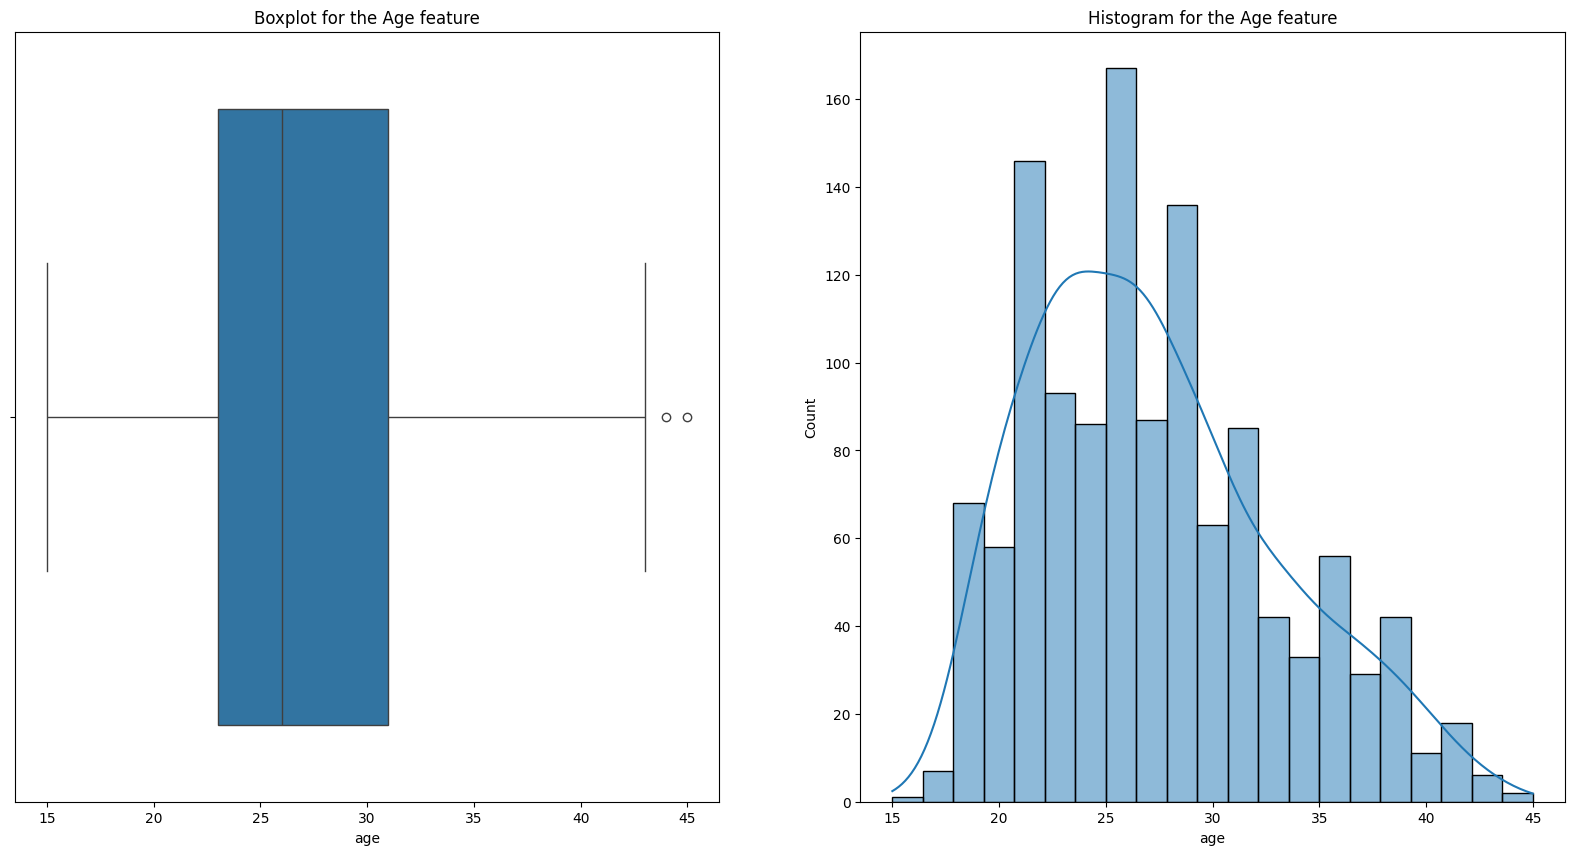

In [100]:
plt.subplots(1,2, figsize=(20,10))

plt.subplot(1,2,1)
plt.title('Boxplot for the Age feature')
sns.boxplot(df, x='age')

plt.subplot(1,2,2)
plt.title('Histogram for the Age feature')
sns.histplot(df, x='age', kde=True)

plt.show()

insights:
-based on the data sturcture (right-tailed), we'll use the mean for our data imputation

In [80]:
# imputation for the age column
df['age'].fillna(df['age'].mean(), inplace=True)

In [81]:
df.isnull().sum()

case          0
bwt           0
gestation     0
parity        0
age           0
height       22
weight       36
smoke        10
dtype: int64

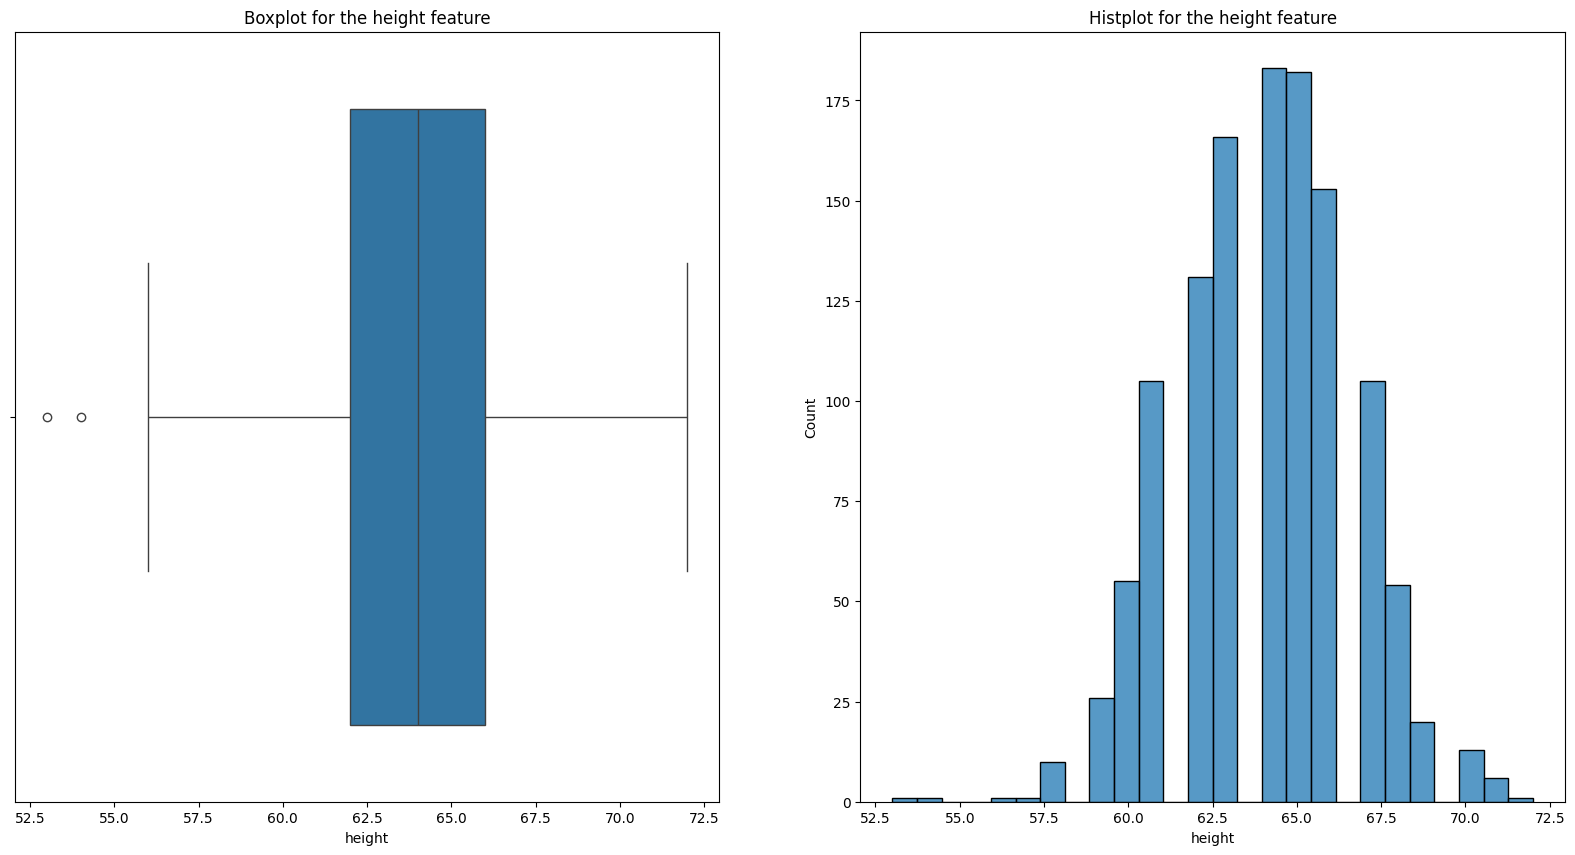

In [87]:


#the visualization for the height feature
plt.subplots(1,2, figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Boxplot for the height feature')
sns.boxplot(df, x='height')

plt.subplot(1,2,2)
plt.title('Histplot for the height feature')
sns.histplot(df, x='height')

plt.show()

In [88]:
df['height'].fillna(df['height'].mean(), inplace=True)

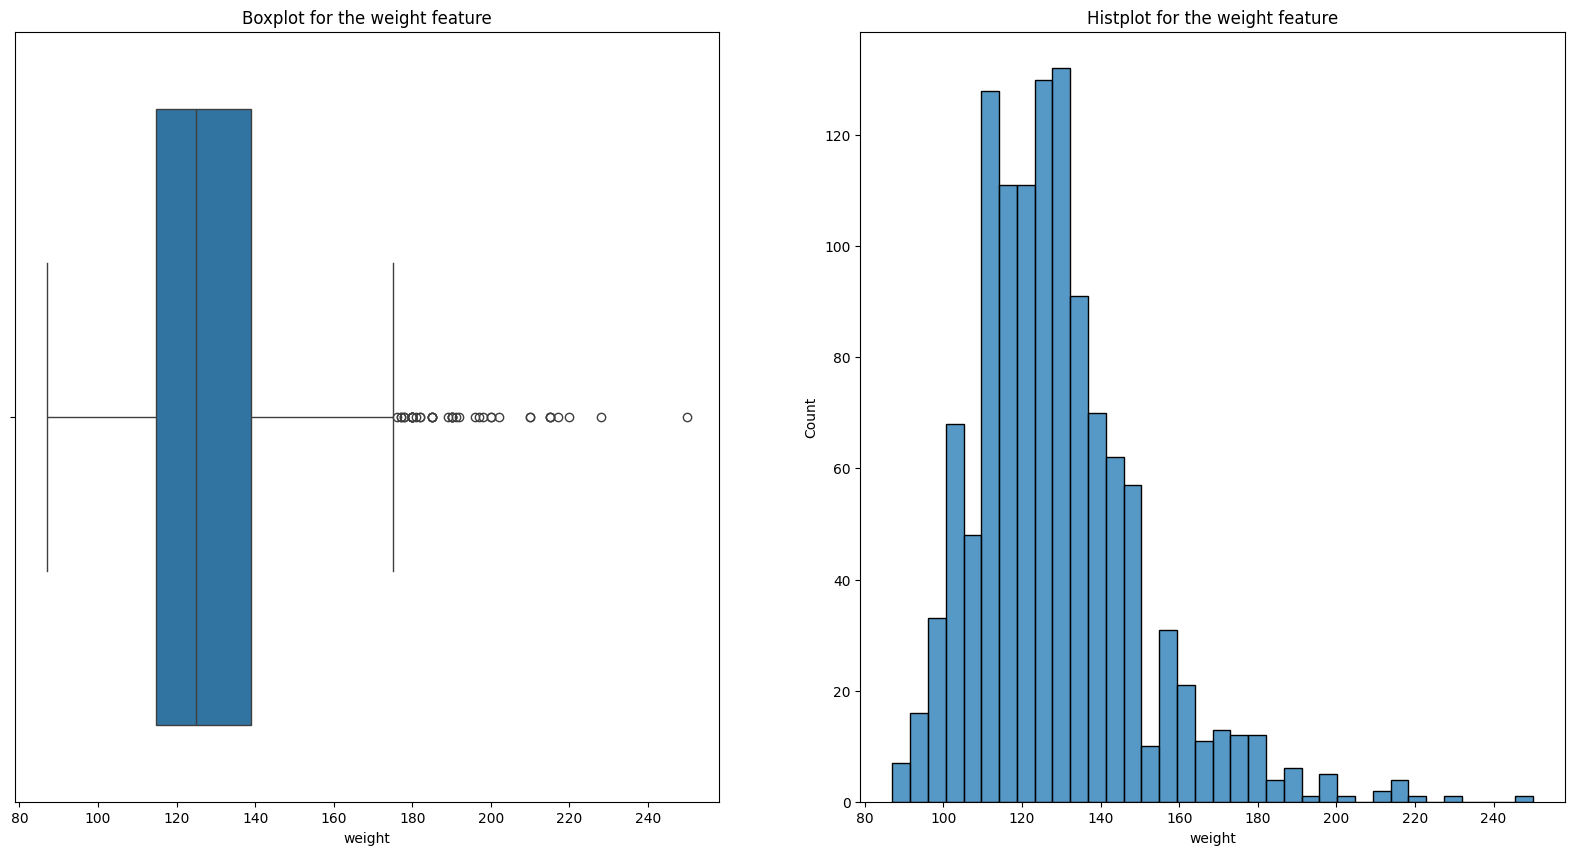

In [91]:
#the visualization for the weight feature
plt.subplots(1,2, figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Boxplot for the weight feature')
sns.boxplot(df, x='weight')

plt.subplot(1,2,2)
plt.title('Histplot for the weight feature')
sns.histplot(df, x='weight')

plt.show()

In [92]:
df['weight'].fillna(df['weight'].mean(), inplace=True)

In [101]:
df['smoke'].unique()

array([0., 1.])

observation:
- this dataset is a categorical data with two unique values. so, we will use the most frequent value(mode) for our data imputation

In [96]:
df['smoke'].mode()[0]

np.float64(0.0)

In [ ]:
from sklearn.impute.

In [97]:
df['smoke'].fillna(df['smoke'].mode()[0], inplace=True)

In [98]:
df.isnull().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

### 3.0 Exploratory Data analysis of the dataset
What to do:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

In [102]:
df.columns

Index(['case', 'bwt', 'gestation', 'parity', 'age', 'height', 'weight',
       'smoke'],
      dtype='object')

## Univariate analysis

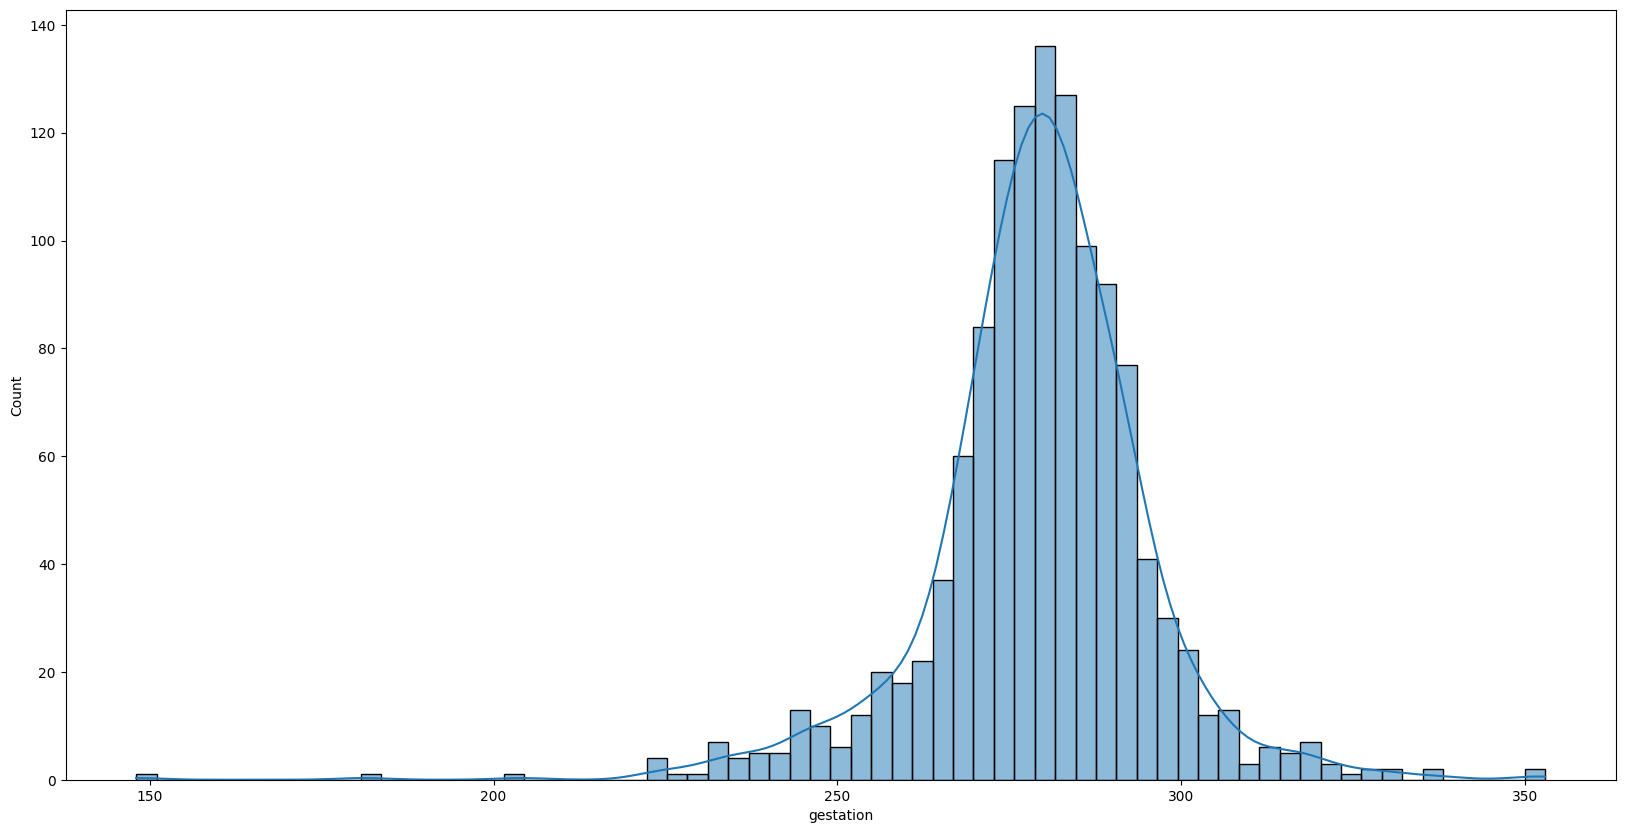

In [104]:
plt.figure(figsize=(20,10))
sns.histplot(df, x='gestation', kde=True)
plt.show()

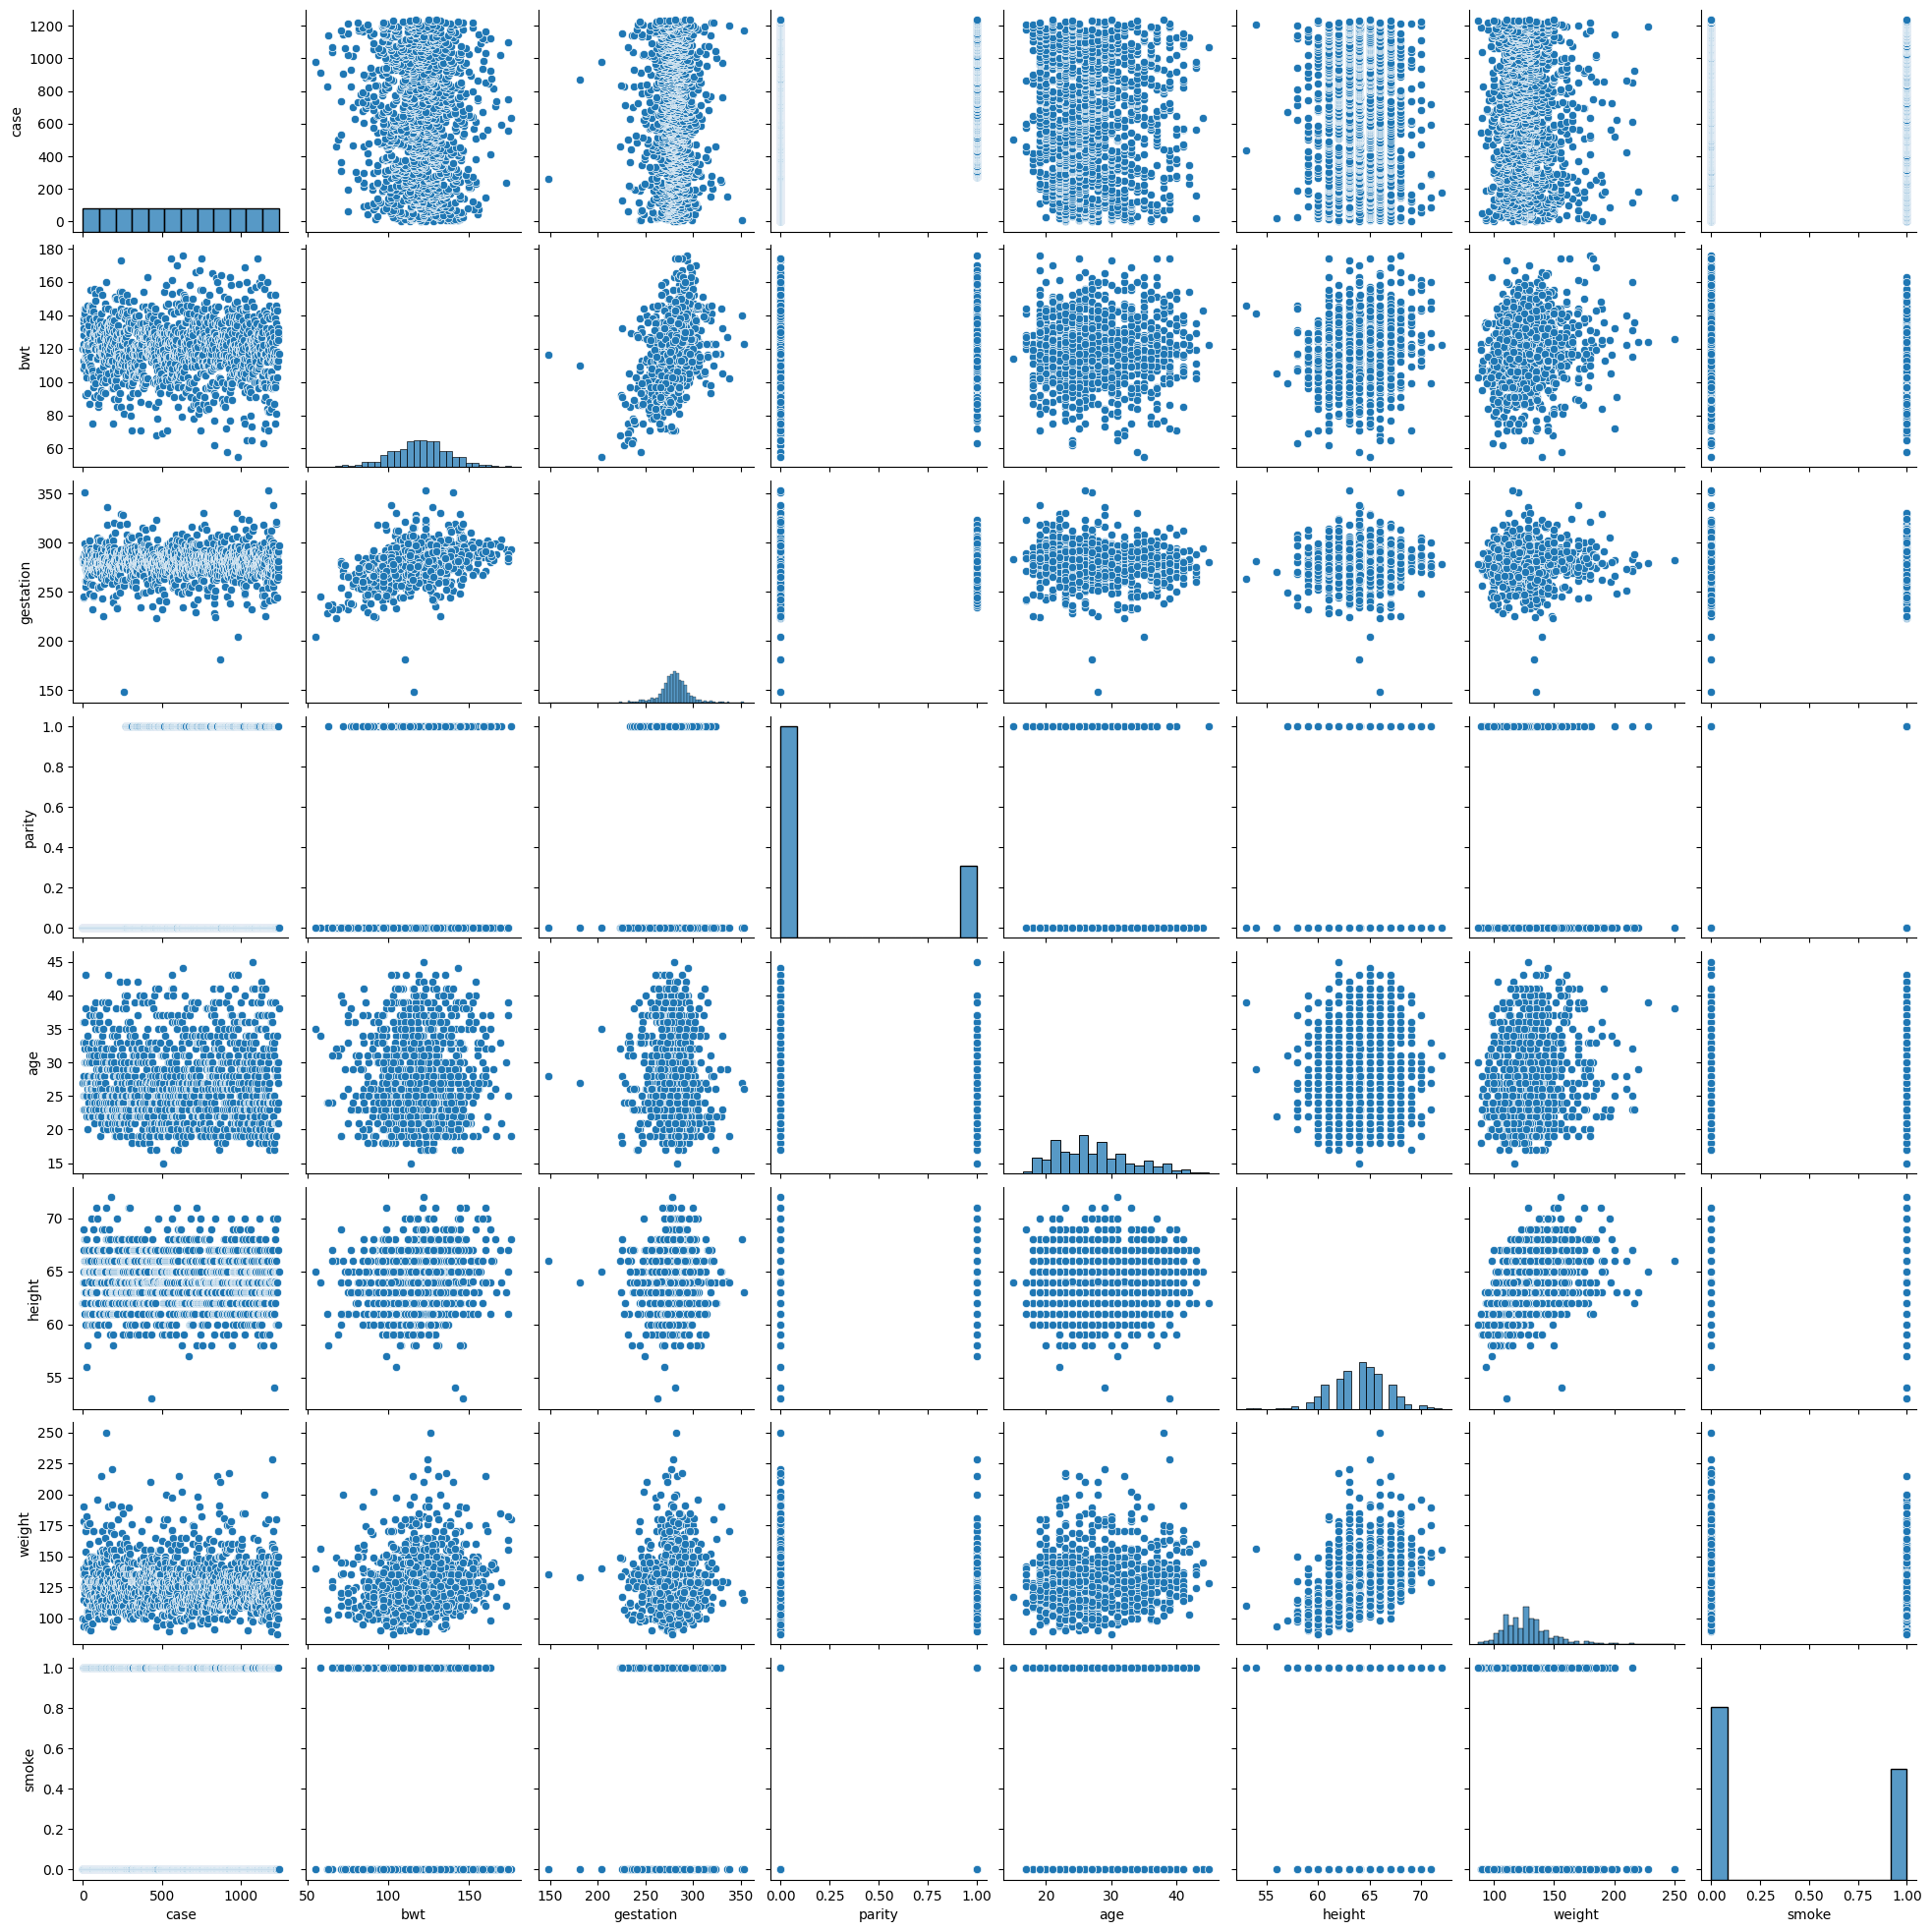

In [105]:
sns.pairplot(df)

In [107]:
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.000000,0,27.0,62.0,100.0,0.0
1,2,113,282.000000,0,33.0,64.0,135.0,0.0
2,3,128,279.000000,0,28.0,64.0,115.0,1.0
3,4,123,279.338512,0,36.0,69.0,190.0,0.0
4,5,108,282.000000,0,23.0,67.0,125.0,1.0
